<a href="https://colab.research.google.com/github/Rashi2011/Rashi-Madhukar/blob/master/CNN_Operations_From_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip install tensorflow==1.14

In [2]:
#Libraries
import numpy as np
import tensorflow as tf

In [3]:
#Downloading the Data
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2020-08-01 01:56:44--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.204.128, 64.233.188.128, 64.233.189.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.204.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  36.6MB/s    in 1.8s    

2020-08-01 01:56:48 (36.6 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [4]:
import os
import zipfile
local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [5]:
#defining the directories
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')

In [6]:
#Directory with our training cat and dog pictures
train_cat_dir = os.path.join(train_dir,'cats')
train_dog_dir = os.path.join(train_dir,'dogs')

#Directory with our validation cat and dog pictures
validation_cat_dir = os.path.join(validation_dir,'cats')
validation_dog_dir = os.path.join(validation_dir,'dogs')

In [7]:
#seeing filenames of cats and dogs in training dir
train_cats_fname = os.listdir(train_cat_dir)
print(train_cats_fname)
train_dogs_fname = os.listdir(train_dog_dir)
print(train_dogs_fname)

['cat.985.jpg', 'cat.791.jpg', 'cat.276.jpg', 'cat.756.jpg', 'cat.473.jpg', 'cat.462.jpg', 'cat.539.jpg', 'cat.5.jpg', 'cat.381.jpg', 'cat.267.jpg', 'cat.593.jpg', 'cat.847.jpg', 'cat.0.jpg', 'cat.398.jpg', 'cat.875.jpg', 'cat.925.jpg', 'cat.778.jpg', 'cat.83.jpg', 'cat.11.jpg', 'cat.923.jpg', 'cat.315.jpg', 'cat.37.jpg', 'cat.325.jpg', 'cat.115.jpg', 'cat.248.jpg', 'cat.498.jpg', 'cat.724.jpg', 'cat.971.jpg', 'cat.725.jpg', 'cat.592.jpg', 'cat.951.jpg', 'cat.53.jpg', 'cat.946.jpg', 'cat.695.jpg', 'cat.126.jpg', 'cat.415.jpg', 'cat.504.jpg', 'cat.521.jpg', 'cat.124.jpg', 'cat.545.jpg', 'cat.139.jpg', 'cat.161.jpg', 'cat.999.jpg', 'cat.206.jpg', 'cat.49.jpg', 'cat.659.jpg', 'cat.447.jpg', 'cat.298.jpg', 'cat.80.jpg', 'cat.739.jpg', 'cat.9.jpg', 'cat.544.jpg', 'cat.797.jpg', 'cat.188.jpg', 'cat.418.jpg', 'cat.611.jpg', 'cat.727.jpg', 'cat.16.jpg', 'cat.31.jpg', 'cat.19.jpg', 'cat.759.jpg', 'cat.335.jpg', 'cat.548.jpg', 'cat.478.jpg', 'cat.936.jpg', 'cat.389.jpg', 'cat.723.jpg', 'cat.156.

In [8]:
#seeing filenames of cats and dogs in validation dir
validation_cats_fname = os.listdir(validation_cat_dir)
print(validation_cats_fname)
validation_dogs_fname = os.listdir(validation_dog_dir)
print(validation_dogs_fname)

['cat.2384.jpg', 'cat.2418.jpg', 'cat.2326.jpg', 'cat.2369.jpg', 'cat.2136.jpg', 'cat.2185.jpg', 'cat.2193.jpg', 'cat.2273.jpg', 'cat.2413.jpg', 'cat.2340.jpg', 'cat.2456.jpg', 'cat.2089.jpg', 'cat.2172.jpg', 'cat.2105.jpg', 'cat.2120.jpg', 'cat.2451.jpg', 'cat.2125.jpg', 'cat.2363.jpg', 'cat.2155.jpg', 'cat.2091.jpg', 'cat.2040.jpg', 'cat.2412.jpg', 'cat.2365.jpg', 'cat.2143.jpg', 'cat.2157.jpg', 'cat.2407.jpg', 'cat.2208.jpg', 'cat.2360.jpg', 'cat.2395.jpg', 'cat.2313.jpg', 'cat.2047.jpg', 'cat.2347.jpg', 'cat.2128.jpg', 'cat.2463.jpg', 'cat.2448.jpg', 'cat.2084.jpg', 'cat.2167.jpg', 'cat.2375.jpg', 'cat.2218.jpg', 'cat.2153.jpg', 'cat.2080.jpg', 'cat.2024.jpg', 'cat.2081.jpg', 'cat.2474.jpg', 'cat.2032.jpg', 'cat.2276.jpg', 'cat.2372.jpg', 'cat.2075.jpg', 'cat.2196.jpg', 'cat.2478.jpg', 'cat.2055.jpg', 'cat.2231.jpg', 'cat.2203.jpg', 'cat.2355.jpg', 'cat.2010.jpg', 'cat.2152.jpg', 'cat.2345.jpg', 'cat.2027.jpg', 'cat.2257.jpg', 'cat.2111.jpg', 'cat.2057.jpg', 'cat.2294.jpg', 'cat.23

In [9]:
#Finding total number of cats and dogs images in both the directories
print("no of train_cat",len(os.listdir(train_cat_dir)))
print("no of train_dog",len(os.listdir(train_dog_dir)))
print("no of validation_cat",len(os.listdir(validation_cat_dir)))
print("no of validation_dog",len(os.listdir(validation_dog_dir)))

no of train_cat 1000
no of train_dog 1000
no of validation_cat 500
no of validation_dog 500


In [10]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

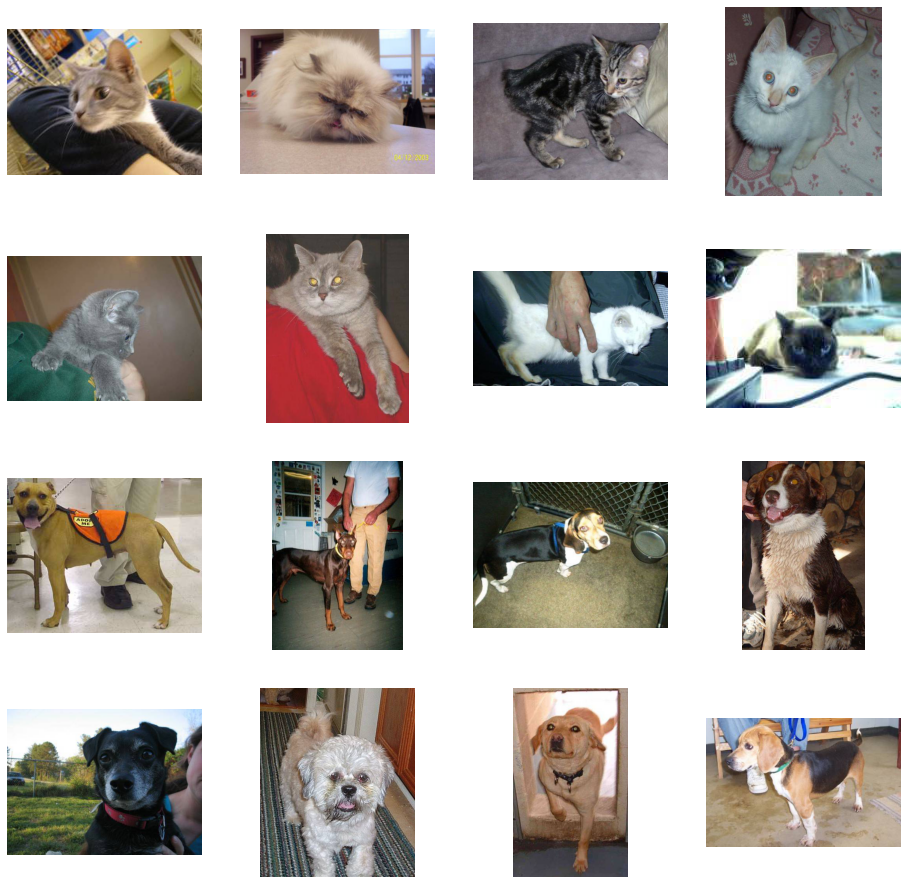

In [11]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_cat_pix = [os.path.join(train_cat_dir, fname) 
                for fname in train_cats_fname[pic_index-8:pic_index]]
next_dog_pix = [os.path.join(train_dog_dir, fname) 
                for fname in train_dogs_fname[pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

#plt.show()


In [35]:
#Scaling the image to (150x150x3)

from tensorflow.keras.preprocessing.image import img_to_array,load_img
X_train = []
# Set up matplotlib fig, and size it to fit 4x4 pics
next_cat_pix = [os.path.join(train_cat_dir, fname) 
                for fname in train_cats_fname[0:]]
next_dog_pix = [os.path.join(train_dog_dir, fname) 
                for fname in train_dogs_fname[0:]]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):

  img = mpimg.imread(img_path)
  img = load_img(img_path,target_size = (150,150))
  X_train.append( img_to_array(img))

#preprocessed training data of 2000 example which contain dogs and cats both
X_train = np.asarray(X_train)
print("X_train.shape",X_train.shape)

#Rescale the training examples
X_train = X_train/255.0
#print(X_train.shape)


X_train.shape (2000, 150, 150, 3)


In [13]:
Y_train = []
for i in range(0,len(os.listdir(train_cat_dir)*2)):
  if i < len(os.listdir(train_cat_dir)):
    Y_train.append(1)
  else:
    Y_train.append(0)

Y_train = np.asarray(Y_train)
print(Y_train.shape)

(2000,)


In [14]:
#Convolutional Operation(conv Single step )
def conv_single_step(A_slice_prev,W,b):
  #Element-wise multiplication between A_prev and W and then adding bias b
  s = np.multiply(A_slice_prev,W)
  z = np.sum(s)
  z = z + float(b)

  return z


In [15]:
'''
np.random.seed(1)
A_slice_prev = np.random.randn(4,4,3)
W = np.random.randn(4,4,3)
b = np.random.randn(1,1,1)
z = conv_single_step(A_slice_prev,W,b)
print("z.shape ",z.shape)
print("z = ",z)
'''

'\nnp.random.seed(1)\nA_slice_prev = np.random.randn(4,4,3)\nW = np.random.randn(4,4,3)\nb = np.random.randn(1,1,1)\nz = conv_single_step(A_slice_prev,W,b)\nprint("z.shape ",z.shape)\nprint("z = ",z)\n'

In [16]:
#Forward Pass
def conv_forward(A_prev,W,b,hparameter):
  #Retrieve dimensions from A_prev
  (m,n_h_prev,n_w_prev,n_c_prev) = A_prev.shape

  #Retrieve dimensions from W
  (f,f,n_c_prev,n_C) = W.shape

  #retrieve info from hparameters
  stride = hparameter['stride']
  pad = hparameter['pad']

  #compute the dimensions of the conv output
  n_H = int((n_h_prev+ 2*pad -f)//stride) +1
  n_W = int((n_w_prev + 2*pad -f)//stride)+1

  #initialize the output volume Z
  Z = np.zeros([m,n_H,n_W,n_C])

  for i in range(m):
    a_prev = A_prev[i,:,:,:] 
    for h in range(n_H):
      vert_start = h*stride
      vert_end = h*stride + f
      for w in range(n_W):
        horiz_start = w*stride
        horiz_end = w*stride + f
        for c in range(n_C):
          a_slice_prev = a_prev[vert_start:vert_end,horiz_start:horiz_end,:]

          Z[i,h,w,c] = conv_single_step(a_slice_prev,W[:,:,:,c],b[:,:,:,c])

  #making sure the output shape is correct
  assert(Z.shape == (m,n_H,n_W,n_C))
  cache = (A_prev,W,b,hparameters)
  return Z,cache


In [17]:
'''
np.random.seed(0)
A_prev = np.random.randn(10,5,7,4)
W = np.random.randn(3,3,4,8)
b = np.random.randn(1,1,1,8)
hparameters = { "pad" :0,"stride": 1}
Z,cache = conv_forward(A_prev,W,b,hparameters)
print("Z.shape : ",Z.shape)
'''

'\nnp.random.seed(0)\nA_prev = np.random.randn(10,5,7,4)\nW = np.random.randn(3,3,4,8)\nb = np.random.randn(1,1,1,8)\nhparameters = { "pad" :0,"stride": 1}\nZ,cache = conv_forward(A_prev,W,b,hparameters)\nprint("Z.shape : ",Z.shape)\n'

In [18]:
#Pooling
def pool_forward(A_prev,hparameters,mode):
  #Retrieve dim from A_prev
  (m,n_h_prev,n_w_prev,n_c_prev) = A_prev.shape
  #Retrieve info from hparameters
  f = hparameters['f']
  stride = hparameters['stride']

  # Define the dimensions of the output
  n_H = int(1 + (n_h_prev - f) // stride)
  n_W = int(1 + (n_w_prev - f) // stride)
  n_C = n_c_prev
  A = np.zeros((m, n_H, n_W, n_C))              
    
  for i in range(m):                         
    for h in range(n_H):      

      vert_start = h*stride
      vert_end = h*stride+f
      for w in range(n_W):

        horiz_start = w*stride 
        horiz_end = w*stride + f 
        for c in range (n_C):      
          a_prev_slice = A_prev[i,vert_start:vert_end,horiz_start:horiz_end, c ]
          if mode == "max":
            A[i, h, w, c] = np.max(a_prev_slice)
          elif mode == "average":
            A[i, h, w, c] = np.mean(a_prev_slice)

  #storing the input and hparameters for backward pass
  cache = (A_prev,hparameters)

  #making sure the dimension of output are correct
  assert(A.shape == (m,n_H,n_W,n_C))

  return A,cache


In [19]:
'''
np.random.seed(2)
A_prev = np.random.randn(2000, 15, 15, 6)
hparameters = {"stride" : 1, "f": 3}
A,cache = pool_forward(A_prev,hparameters,"max")
print("A.shape",A.shape)
'''

'\nnp.random.seed(2)\nA_prev = np.random.randn(2000, 15, 15, 6)\nhparameters = {"stride" : 1, "f": 3}\nA,cache = pool_forward(A_prev,hparameters,"max")\nprint("A.shape",A.shape)\n'

In [20]:
def flatten(A):
  X = A.reshape(A.shape[0],A.shape[1]*A.shape[2]*A.shape[3])
  return X


In [21]:
#Backward Pass
def conv_backward(dZ,cache):
   #retrieve information from cache
   (A_prev,W,b,hparameters) = cache
   #retrieve shape from A_prev
   (m,n_H_prev,n_W_prev,n_C_prev) = A_prev.shape
   #retrive shape from W shape
   (f,f,n_C_prev,n_C) = W.shape
   #retrieve info from hparameters
   stride = hparameters['stride']
   pad = hparameters['pad']
   #retrieve info from dZ shape 
   (m,n_H,n_W,n_C) = dZ.shape

   #Initialize dA_prev,dW,db with correct shape
   dA_prev = np.zeros((m,n_H_prev,n_W_prev,n_C_prev))
   dW = np.zeros((f,f,n_C_prev,n_C))
   db = np.zeros((1,1,1,n_C))

   for i in range(m):
     a_prev = A_prev[i,:,:,:]
     da_prev = dA_prev[i,:,:,:]

     for h in range(n_H):
       vert_start = h*stride
       vert_end = h*stride +f

       for w in range(n_W):
         horiz_start = w*stride
         horiz_end = w*stride +f

         for c in range(n_C):
           a_prev_slice = a_prev[vert_start:vert_end,horiz_start:horiz_end,:]

           #Update gradient 
           da_prev[vert_start:vert_end,horiz_start:horiz_end,:] += W[:,:,:,c]*dZ[i,h,w,c]
           dW[:,:,:,c] += a_prev_slice*dZ[i,h,w,c]
           db[:,:,:,c] += dZ[i,h,w,c] 

     dA_prev[i, :, :, :] = da_prev[:,:,:] 
   print(dA_prev.shape)
   print(dW.shape)
   print(db.shape)
   #making sure your output shape is correct
   assert(dA_prev.shape == (m,n_H_prev,n_W_prev,n_C_prev))
   return dA_prev,dW,db


In [22]:
'''
np.random.seed(1)
A_prev = np.random.randn(10,4,4,3)
W = np.random.randn(2,2,3,8)
b = np.random.randn(1,1,1,8)
hparameters = {"pad": 0,"stride": 1}

Z,cache = conv_forward(A_prev,W,b,hparameters)
dA_prev,dW,db = conv_backward(Z,cache)
'''

'\nnp.random.seed(1)\nA_prev = np.random.randn(10,4,4,3)\nW = np.random.randn(2,2,3,8)\nb = np.random.randn(1,1,1,8)\nhparameters = {"pad": 0,"stride": 1}\n\nZ,cache = conv_forward(A_prev,W,b,hparameters)\ndA_prev,dW,db = conv_backward(Z,cache)\n'

In [23]:
#backward pooling when mode == 'max' 
def create_mask_from_window(x):
  mask = x==np.max(x)
  return mask

#backward pooling when mode = 'average'
def distribute_values(dz,shape):
  (n_H,n_W) = shape
  average = dz/(n_H*n_W)
  # create a matrix where every entry is the "average" value
  a = np.ones(shape)*average
  return a 

In [24]:
#Pool Backward
def pool_backward(dA,cache,mode):
  (A_prev,hparameters) = cache
  stride = hparameters['stride']
  f = hparameters['f']
  #retrieve dim from A_prev and dA
  (m,n_H_prev,n_W_prev,n_C_prev) = A_prev.shape
  (m,n_H,n_W,n_C) = dA.shape

  #intialize dA_prev with zeroes
  dA_prev = np.zeros((m,n_H_prev,n_W_prev,n_C_prev))
  for i in range(m):
    a_prev = A_prev[i,:,:,:]
    for h in range(n_H):
      vert_start = stride*h
      vert_end = h*stride +f
      for w in range(n_W):
        horiz_start = w*stride
        horiz_end = w*stride+f
        for c in range(n_C):
          if mode == "max":
            a_prev_slice = a_prev[vert_start:vert_end,horiz_start:horiz_end,c]
            mask = create_mask_from_window(a_prev_slice)
            dA_prev[i,vert_start:vert_end,horiz_start:horiz_end,c] += np.multiply(mask,a_prev_slice)

          elif mode == "average":
            da = dA[i,h,w,c]
            shape = (f,f)
            dA_prev[i,vert_start:vert_end,horiz_start:horiz_end,c] += distribute_values(da,shape)

  assert((dA_prev.shape == (m,n_H_prev,n_W_prev,n_C_prev)))
  return dA_prev


In [25]:
'''
np.random.seed(1)
A_prev = np.random.randn(5,5,3,2)
hparameters = {'stride': 1,"f": 2}
A,cache = pool_forward(A_prev,hparameters,mode= "average")
dA = np.random.randn(5,4,2,2)

dA_prev = pool_backward(dA,cache,mode = "average")
print(dA_prev.shape)
print(dA_prev[1][1])
'''

'\nnp.random.seed(1)\nA_prev = np.random.randn(5,5,3,2)\nhparameters = {\'stride\': 1,"f": 2}\nA,cache = pool_forward(A_prev,hparameters,mode= "average")\ndA = np.random.randn(5,4,2,2)\n\ndA_prev = pool_backward(dA,cache,mode = "average")\nprint(dA_prev.shape)\nprint(dA_prev[1][1])\n'

In [36]:

#1st convolutional 2D operation
np.random.seed(0)
print(X_train.shape)
A_prev = X_train
W = np.random.randn(3,3,3,6)
b = np.random.randn(1,1,1,6)
hparameters = { "pad" :0,"stride": 2}
Z,cache = conv_forward(A_prev,W,b,hparameters)
print("Z.shape : ",Z.shape)
  
#Max Pooling
hparameters = {"f": 3,"stride": 1}
A = np.tanh(Z)
print("A.shape",A.shape)
A,cache = pool_forward(Z,hparameters,"max")
print("A.shape",A.shape)

#2nd layer of conv2D operation
A_prev = A
W = np.random.randn(3,3,6,3)
b = np.random.randn(1,1,1,3)
hparameters = { "pad" :0,"stride": 2}
Z,cache = conv_forward(A_prev,W,b,hparameters)
print("Z.shape : ",Z.shape)

#Max Pooling
hparameters = {"f": 3,"stride": 1}
A = np.tanh(Z)
print("A.shape",A.shape)
A,cache = pool_forward(Z,hparameters,"max")
print("A.shape",A.shape)

#Flatten()
'''
X = flatten(A)
print(X.shape)
'''

(2000, 150, 150, 3)
Z.shape :  (2000, 74, 74, 6)
A.shape (2000, 74, 74, 6)
A.shape (2000, 72, 72, 6)
Z.shape :  (2000, 35, 35, 3)
A.shape (2000, 35, 35, 3)
A.shape (2000, 33, 33, 3)


'\nX = flatten(A)\nprint(X.shape)\n'

In [46]:
#Adding the dense layer or Fully Connected Layer using Tensorflow
from tensorflow import keras
model = tf.keras.Sequential([
                            tf.keras.layers.Flatten(input_shape = (33,33,3)),
                            tf.keras.layers.Dense(128,activation = 'relu'),
                            tf.keras.layers.Dense(1,activation = 'sigmoid')
                            ])

In [47]:
model.summary()


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 3267)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               418304    
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 129       
Total params: 418,433
Trainable params: 418,433
Non-trainable params: 0
_________________________________________________________________


In [48]:
model.compile(optimizer = tf.optimizers.Adam(), loss = 'binary_crossentropy',metrics = ['acc'])

In [49]:
history = model.fit(A,Y_train,epochs = 210)

Epoch 1/210
63/63 [==============================] - 0s 5ms/step - loss: 10.5346 - acc: 0.5305
Epoch 2/210
63/63 [==============================] - 0s 5ms/step - loss: 1.7307 - acc: 0.5485
Epoch 3/210
63/63 [==============================] - 0s 4ms/step - loss: 0.9660 - acc: 0.5930
Epoch 4/210
63/63 [==============================] - 0s 5ms/step - loss: 0.9683 - acc: 0.6100
Epoch 5/210
63/63 [==============================] - 0s 5ms/step - loss: 1.0335 - acc: 0.5845
Epoch 6/210
63/63 [==============================] - 0s 4ms/step - loss: 0.9049 - acc: 0.6405
Epoch 7/210
63/63 [==============================] - 0s 4ms/step - loss: 1.0040 - acc: 0.6225
Epoch 8/210
63/63 [==============================] - 0s 4ms/step - loss: 0.8980 - acc: 0.6420
Epoch 9/210
63/63 [==============================] - 0s 4ms/step - loss: 1.2245 - acc: 0.5940
Epoch 10/210
63/63 [==============================] - 0s 4ms/step - loss: 0.7816 - acc: 0.6820
Epoch 11/210
63/63 [==============================] - 0s 5